Copyright © 2023 "Bronte" Sihan Li

## Transfer Learning on Greek Letters

(1) generate the MNIST network (you should import your code from task 1), (2) read an existing model from a file and load the pre-trained weights, (3) freeze the network weights, and (4) replace the last layer with a new Linear layer with three nodes. 

In [14]:
import torch
import torchvision
import torch.optim as optim
from utils.net import Net
from utils.greek_transform import GreekTransform

In [15]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [16]:
# Continue training
greek_network = Net(config='mnist')
greek_network.nn_config.dropout = 0.2

network_state_dict = torch.load(f='results/mnist/model.pth')
greek_network.load_state_dict(network_state_dict)


<All keys matched successfully>

In [17]:
# freezes the parameters for the whole network
for param in greek_network.parameters():
    param.requires_grad = False

In [18]:
# Replace last layer with new linear layer with 3 output nodes

greek_network.fc2 = torch.nn.Linear(in_features=greek_network.l2, out_features=3)

# Print the network architecture
print(greek_network)
for param in greek_network.parameters():
    print(param.shape)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=3, bias=True)
)
torch.Size([10, 1, 5, 5])
torch.Size([10])
torch.Size([20, 10, 5, 5])
torch.Size([20])
torch.Size([50, 320])
torch.Size([50])
torch.Size([3, 50])
torch.Size([3])


In [19]:
# Initialize the optimizer on new network
greek_optimizer = optim.SGD(greek_network.parameters(), lr=0.001,
                                momentum=0.5)


In [20]:
import torchvision.transforms as transforms
from torch.utils.data.dataloader import default_collate

# DataLoader for the Greek data set
training_set_path = 'files/greek_train'

# Use MPS if available for M1 GPU acceleration
if torch.backends.mps.is_available():
        mps_device = torch.device("mps")
        
greek_train = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(training_set_path,
                                     transform = torchvision.transforms.Compose(
    [transforms.RandomHorizontalFlip(),  # randomly flip the image horizontally
    transforms.RandomRotation(10), torchvision.transforms.ToTensor(), GreekTransform(), torchvision.transforms.Normalize((0.1307,), (0.3081,) ) ] ) ),
    batch_size = 5,
    shuffle = True,
    collate_fn=lambda x: [y.to(mps_device) for y in default_collate(x)] )

# We will use the same test set as in the previous part
greek_test = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(training_set_path,
                                     transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(), GreekTransform(), torchvision.transforms.Normalize((0.1307,), (0.3081,) ) ] ) ),
    batch_size = 27,
    shuffle = True,
    collate_fn=lambda x: [y.to(mps_device) for y in default_collate(x)] )

In [21]:
# Plot example data
examples = enumerate(greek_train)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)

torch.Size([5, 1, 28, 28])


/var/folders/cx/l3gnx5dn4gs_zc1wtxc7xyf40000gn/T/ipykernel_20177/2059447943.py:11: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



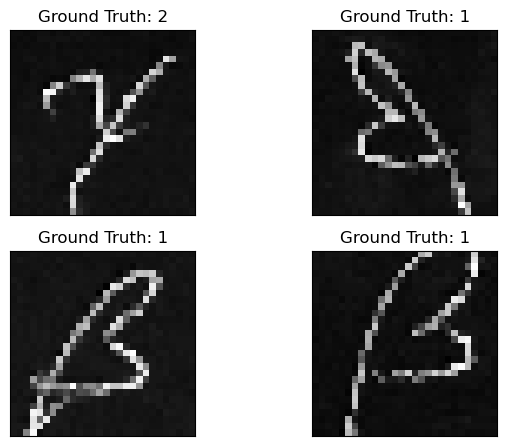

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].cpu(), cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig.show()

In [23]:
# Train the network
from utils.train_test import train, test

# Transfer the network to the device MPS so we get GPU acceleration
if torch.backends.mps.is_available():
      mps_device = torch.device("mps")
      greek_network.to(mps_device)

# track train losses
train_losses_all = []
train_counter_all = []
for epoch in range(1, 200):
    train_losses, train_counter = train(epoch, greek_train, 5, greek_network, greek_optimizer, save_dir='results/greek')
    train_losses_all += train_losses
    train_counter_all += train_counter


/Users/apple/Documents/ALIGN CS/CS6140 ML/machine-learning-projects/mlprojects/project4/utils/net.py:103: UserWarning:

Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
Train Epoch: 1 [0/27 (0%)]	Loss: 1.011571
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
torch.Size([2, 1, 28, 28])
torch.Size([2, 3]) torch.Size([2])
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
Train Epoch: 2 [0/27 (0%)]	Loss: 1.402631
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
torch.Size([2, 1, 28, 28])
torch.Size([2, 3]) torch.Size([2])
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
Train Epoch: 3 [0/27 (0%)]	Loss: 0.894813
torch.Size([5, 1, 28, 28])
torch.Size([5, 3]) torch.Size([5])
torch.

In [24]:
# Get accuracy
test_losses = test(network=greek_network, test_loader=greek_test)
print(test_losses)


Test set: Avg. loss: 0.4746, Accuracy: 26/27 (96%)

[0.4746026286372432]


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning:

size_average and reduce args will be deprecated, please use reduction='sum' instead.



/var/folders/cx/l3gnx5dn4gs_zc1wtxc7xyf40000gn/T/ipykernel_20177/2376841540.py:13: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



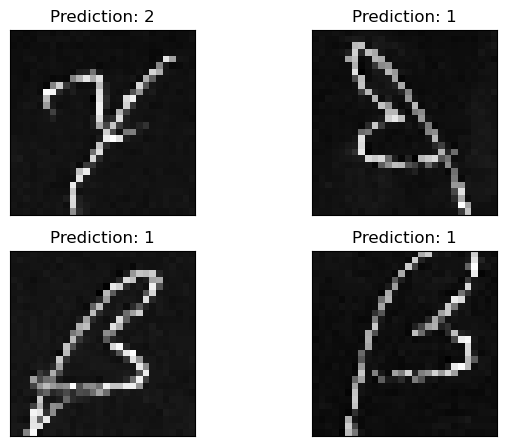

In [25]:
with torch.no_grad():
  output = greek_network(example_data)

fig = plt.figure()
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0].cpu(), cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig.show()

In [26]:
import plotly.express as px

fig = px.line(x=train_counter_all, y=train_losses_all,
              title='Greek Letter Training Loss', labels={'x': 'Number of Training Examples Seen', 'y': 'Training Loss'})
fig.show()